# KNN classification

# Running LogisticRegression and SVM

In [4]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
 
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Train -> ',lr.score(X_train,y_train))
print('Test -> ',lr.score(X_test,y_test))


# Apply SVM and print scores
svm = SVC()
svm.fit(X_train,y_train)
print('Train -> ',svm.score(X_train,y_train))
print('Test -> ',svm.score(X_test,y_test))


Train -&gt;  1.0
Test -&gt;  0.9577777777777777
Train -&gt;  0.9977728285077951
Test -&gt;  0.9933333333333333


# Visualizing decision boundaries

In [1]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

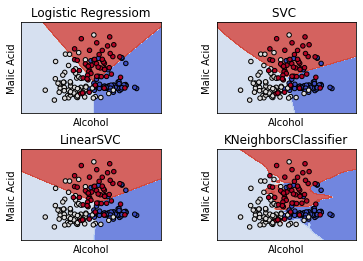

In [67]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Getting the data
wine = datasets.load_wine()
X=wine.data[:,:2]
y=wine.target

# Define the classifiers
models = [LogisticRegression(),SVC(),LinearSVC(),KNeighborsClassifier()]
# Fit the classifiers
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('Logistic Regressiom',
          'SVC ',
          'LinearSVC',
          'KNeighborsClassifier')

# Plot the classifiers
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Malic Acid')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Minimizing a lost function

In [69]:
import pandas as pd 
from sklearn.linear_model import LinearRegression

from scipy.optimize import minimize
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true-y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[0.01002137 0.33787973]
[0.0100214  0.33787959]


# Comparing the logistic and hinge losses

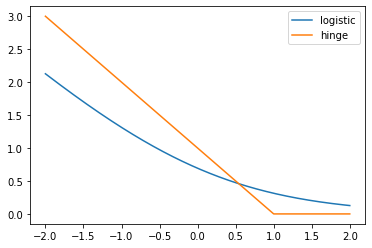

In [71]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

# Implementing logistic regression

In [12]:
from sklearn import datasets
import numpy as np
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression

# Loading data
data = datasets.load_breast_cancer()

X = data.data[:,:10]
y = data.target

# Standarizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))


# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X_std[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X_std[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X_std,y)
print(lr.coef_)

[ 587.80994474  -69.8114307   105.08289692 -934.78466563  -31.71647344
    5.91668169   16.77022247 -106.86529664  -30.03561231   -1.07581637]
[[ 1.03665946 -1.65380077  4.08233062 -9.40904867 -1.06787935  0.07901598
  -0.85099843 -2.44107473 -0.45288928  0.43348202]]


# Regularized logistic regression

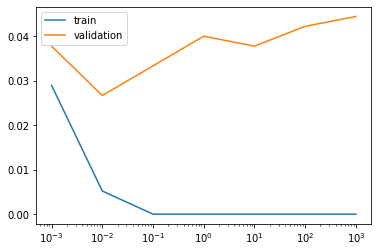

In [40]:
from sklearn import datasets
import numpy as np
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

# Loading data
data = datasets.load_digits()

X = data.data
y = data.target

# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y)

# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Loop over values of C_value
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train,y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train,y_train) )
    valid_errs.append( 1.0 - lr.score(X_test,y_test) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()


# Logistic regression and feature selection

In [49]:
from sklearn.model_selection import GridSearchCV
# Specify L1 regularization
lr = LogisticRegression()

parameters = {'penalty': ['l1'], 'solver' : ['liblinear'],'C':[0.001, 0.01, 0.1, 1, 10] }

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {&#39;C&#39;: 0.1, &#39;penalty&#39;: &#39;l1&#39;, &#39;solver&#39;: &#39;liblinear&#39;}
Total number of features: 640
Number of selected features: 251


# Identifying the features

In [71]:
# Get the indices of the sorted cofficients

vocab = data.feature_names * 10
# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]],end=", ")
print("\n")

Most positive words: pixel_2_5, pixel_2_3, pixel_1_4, pixel_7_6, pixel_5_2, 

Most negative words: pixel_4_6, pixel_2_6, pixel_3_4, pixel_5_3, pixel_4_1, 



# Fitting multi-class logistic regression

In [75]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("One Vs Rest training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

One Vs Rest training accuracy: 1.0
OVR test accuracy    : 0.96
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.96


# Effect of removing examples

In [4]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.decomposition import PCA

data = datasets.load_wine()
X = data.data
y = data.target


pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(Xreduced,y)


# Make a new data set keeping only the support vectors
print("Number of original examples", len(Xreduced))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small,y_small)

models=[svm,svm_small]
titles = ['svm','svm_small']

# Plot the classifiers
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

X0s, X1s = X_small[:, 0], X_small[:, 1]
xxs, yys = make_meshgrid(X0s, X1s)


for clf, title, ax in zip(models, titles, sub.flatten()):
    if title == 'svm':
        plot_contours(ax, svm, xx, yy,
                    cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    else:
        plot_contours(ax, svm_small, xxs, yys,
                    cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0s, X1s, c=y_small, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Malic Acid')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


Number of original examples 178
Number of support vectors 105


No handles with labels found to put in legend.
Number of original examples 150
Number of support vectors 27


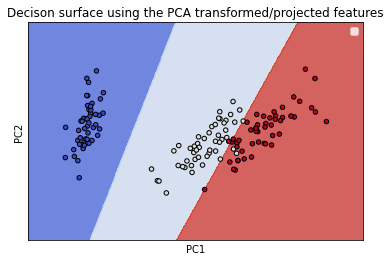

In [2]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data  
y = iris.target

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

print("Number of original examples", len(X))
print("Number of support vectors", len(clf.support_))
X_small = Xreduced[clf.support_]
y_small = y[clf.support_]

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()

No handles with labels found to put in legend.


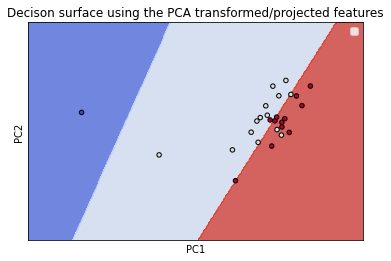

In [3]:

clf2 = model.fit(X_small, y_small) 

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_small[:, 0], X_small[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_small, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()

# Kernel SVMs

In [4]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

data = datasets.load_diabetes()
X = data.data
y = data.target
# Instantiate an RBF SVM
X_standard = StandardScaler().fit_transform(X)
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_standard,y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.1}


# Jointly tuning gamma and C with GridSearchCV


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standard,y)

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train,y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test,y_test))

Best CV params {'C': 0.1, 'gamma': 0.1}
Best CV accuracy 0.021166892808683856
Test accuracy of best grid search hypers: 0.0


# Using SGDClassifier (Stochastic Gradient Descent)

In [8]:
from sklearn.linear_model import SGDClassifier

data = datasets.load_diabetes()
X = data.data
y = data.target

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge','log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=5)
searcher.fit(X, y)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X, y))

Best CV params {'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}
Best CV accuracy 0.013585291113381004
Test accuracy of best grid search hypers: 0.029411764705882353
